In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Set to display all columns
pd.options.display.max_columns = None

# Print working version
pd.__version__

'2.1.4'

In [4]:
# Create dataframe and set first column as index as it acts as an index in the original file
df = pd.read_csv('medical_raw_data.csv', index_col=0)

In [6]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [8]:
# Standardize column names using snake_case and re-express names for comprehensiveness
col_names = ['case_order', 'customer_id', 'interaction', 'uid', 'city', 'state', 'county', 'zip', 'latitude', 'longitude', 'population', 'area', 'timezone', 'job', 'children', 'age', 'education', 'employment', 'income', 'marital', 
             'gender', 'readmission', 'vit_d_level', 'doc_visits', 'full_meals_eaten', 'vit_d_supp', 'soft_drink', 'initial_admin', 'high_blood', 'stroke', 'complication_risk', 'overweight', 'arthritis', 'diabetes', 'hyperlipidemia',
             'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'asthma', 'services', 'initial_days', 'total_charge', 'additional_charges', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'item_6', 'item_7', 'item_8']
df.columns = col_names
df.head()

,case_order,customer_id,interaction,uid,city,state,county,zip,latitude,longitude,population,area,timezone,job,children,age,education,employment,income,marital,gender,readmission,vit_d_level,doc_visits,full_meals_eaten,vit_d_supp,soft_drink,initial_admin,high_blood,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,initial_days,total_charge,additional_charges,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [10]:
# View columns, counts, and initial data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_order          10000 non-null  int64  
 1   customer_id         10000 non-null  object 
 2   interaction         10000 non-null  object 
 3   uid                 10000 non-null  object 
 4   city                10000 non-null  object 
 5   state               10000 non-null  object 
 6   county              10000 non-null  object 
 7   zip                 10000 non-null  int64  
 8   latitude            10000 non-null  float64
 9   longitude           10000 non-null  float64
 10  population          10000 non-null  int64  
 11  area                10000 non-null  object 
 12  timezone            10000 non-null  object 
 13  job                 10000 non-null  object 
 14  children            7412 non-null   float64
 15  age                 7586 non-null   float64
 16  education

### Detect Duplicates

In [12]:
# Check for duplicate values for variables that should contain unique values
print('Number of unique case orders:', df.case_order.nunique())
print('Number of unique customer IDs:', df.customer_id.nunique())
print('Number of unique interaction IDs:', df.interaction.nunique())
print('Number of unique UIDs:', df.uid.nunique())

Number of unique case orders: 10000
Number of unique customer IDs: 10000
Number of unique interaction IDs: 10000
Number of unique UIDs: 10000


In [14]:
# Double check for presence of any duplicated records across the entire data frame
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

### Detect Missing Values (Quantitative & Qualitative)

In [16]:
# Sum of counts where N/A values exist for each variable
df.isna().sum()

case_order               0
customer_id              0
interaction              0
uid                      0
city                     0
state                    0
county                   0
zip                      0
latitude                 0
longitude                0
population               0
area                     0
timezone                 0
job                      0
children              2588
age                   2414
education                0
employment               0
income                2464
marital                  0
gender                   0
readmission              0
vit_d_level              0
doc_visits               0
full_meals_eaten         0
vit_d_supp               0
soft_drink            2467
initial_admin            0
high_blood               0
stroke                   0
complication_risk        0
overweight             982
arthritis                0
diabetes                 0
hyperlipidemia           0
back_pain                0
anxiety                984
a

### Detect Outliers (Quantitative Variables)

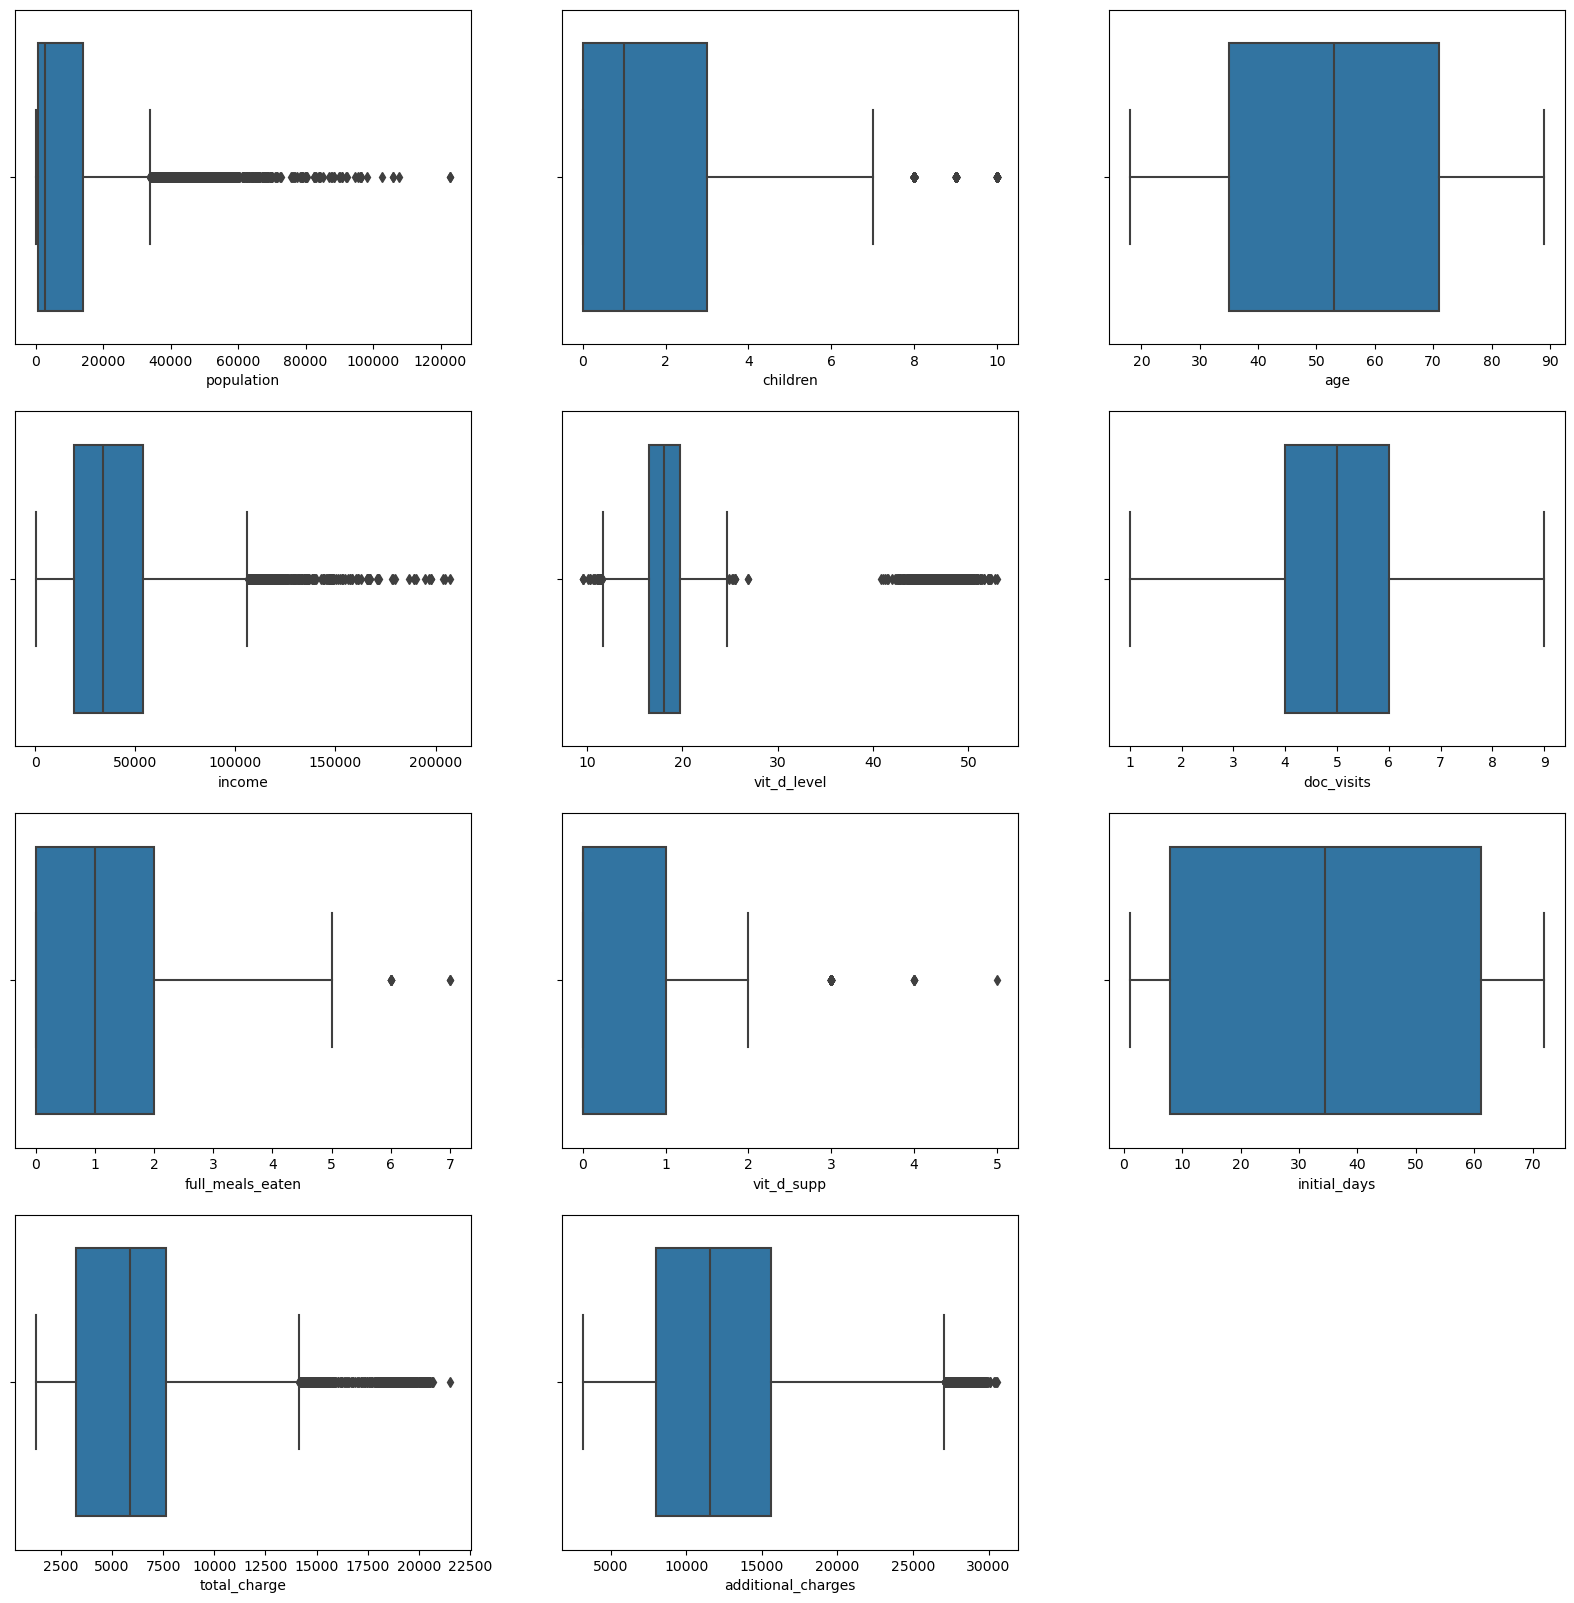

In [18]:
# Visualization of outliers of quantitative variables using boxplots
fig, axes = plt.subplots(4, 3, figsize=(20,20))

sns.boxplot(data=df, x='population', ax=axes[0,0])
sns.boxplot(data=df, x='children', ax=axes[0,1])
sns.boxplot(data=df, x='age', ax=axes[0,2])
sns.boxplot(data=df, x='income', ax=axes[1,0])
sns.boxplot(data=df, x='vit_d_level', ax=axes[1,1])
sns.boxplot(data=df, x='doc_visits', ax=axes[1,2])
sns.boxplot(data=df, x='full_meals_eaten', ax=axes[2,0])
sns.boxplot(data=df, x='vit_d_supp', ax=axes[2,1])
sns.boxplot(data=df, x='initial_days', ax=axes[2,2])
sns.boxplot(data=df, x='total_charge', ax=axes[3,0])
sns.boxplot(data=df, x='additional_charges', ax=axes[3,1])

fig.delaxes(axes[3,2])

#### Verify count and range of outliers using (Q1 - 1.5 * IQR) or (Q3 + 1.5 * IQR)

In [20]:
# Population outliers
df.population[df.population > df.population.quantile(0.75) + (1.5 * (df.population.quantile(0.75) - df.population.quantile(0.25)))].sort_values()

9990     33894
1071     33906
346      33908
2213     33927
3580     34015
         ...  
768     105799
7687    105799
5966    107700
3025    122814
9663    122814
Name: population, Length: 855, dtype: int64

In [22]:
# Children outliers
df.children[df.children > df.children.quantile(0.75) + (1.5 * (df.children.quantile(0.75) - df.children.quantile(0.25)))].sort_values()

10000     8.0
3836      8.0
7661      8.0
3933      8.0
3947      8.0
         ... 
7648     10.0
3880     10.0
7301     10.0
2122     10.0
17       10.0
Name: children, Length: 303, dtype: float64

In [24]:
# Income outliers
df.income[df.income > df.income.quantile(0.75) + (1.5 * (df.income.quantile(0.75) - df.income.quantile(0.25)))].sort_values()

7257    106220.51
958     106521.92
9597    106592.59
4028    106671.88
7392    106691.20
          ...    
1779    197576.18
6407    197675.05
8599    203774.65
842     204542.41
8387    207249.13
Name: income, Length: 252, dtype: float64

In [26]:
# Vitamin D levels lower outliers
iqr = df.vit_d_level.quantile(0.75) - df.vit_d_level.quantile(0.25)
df.vit_d_level[df.vit_d_level < df.vit_d_level.quantile(0.25) - 1.5 * iqr].sort_values()

1629     9.519012
7188     9.553535
8141     9.574292
5259    10.035593
1316    10.296893
2584    10.333760
9510    10.555264
3289    10.681399
791     10.792051
1542    10.994245
6945    11.053855
8135    11.156359
4827    11.164974
5990    11.228023
3638    11.325217
636     11.335095
819     11.346404
8099    11.373258
4260    11.455544
7226    11.457162
9425    11.465299
9368    11.475791
2260    11.489452
8492    11.517152
6920    11.546516
9073    11.593141
Name: vit_d_level, dtype: float64

In [28]:
# Vitamin D levels upper outliers
df.vit_d_level[df.vit_d_level > df.vit_d_level.quantile(0.75) + 1.5 * iqr].sort_values()

6717    24.848518
468     25.188026
65      25.268742
23      25.514635
92      25.546502
          ...    
2616    52.156112
7231    52.271584
7158    52.370764
1307    52.757599
1964    53.019124
Name: vit_d_level, Length: 508, dtype: float64

In [30]:
# Full meals eaten outliers
df.full_meals_eaten[df.full_meals_eaten > df.full_meals_eaten.quantile(0.75) + (1.5 * (df.full_meals_eaten.quantile(0.75) - df.full_meals_eaten.quantile(0.25)))].sort_values()

1232    6
2185    6
6069    6
7218    6
8145    6
9987    6
959     7
4710    7
Name: full_meals_eaten, dtype: int64

In [32]:
# Vitamin D supplement outliers
df.vit_d_supp[df.vit_d_supp > df.vit_d_supp.quantile(0.75) + (1.5 * (df.vit_d_supp.quantile(0.75) - df.vit_d_supp.quantile(0.25)))].sort_values()

63      3
5000    3
5045    3
5217    3
5352    3
       ..
1343    4
9092    4
7181    4
2534    4
3132    5
Name: vit_d_supp, Length: 70, dtype: int64

In [34]:
# Total charges outliers
df.total_charge[df.total_charge > df.total_charge.quantile(0.75) + (1.5 * (df.total_charge.quantile(0.75) - df.total_charge.quantile(0.25)))].sort_values()

1651    14159.65973
3832    14161.29725
2326    14174.35363
1307    14201.93003
711     14202.38298
           ...     
9160    20562.04123
5454    20632.44185
5245    20647.38602
9006    20673.96631
8801    21524.22421
Name: total_charge, Length: 466, dtype: float64

In [36]:
# Additional charges outliers
df.additional_charges[df.additional_charges > df.additional_charges.quantile(0.75) + (1.5 * (df.additional_charges.quantile(0.75) - df.additional_charges.quantile(0.25)))].sort_values()

5285    27088.14922
7343    27113.91044
2106    27116.80933
9341    27117.18274
7096    27119.73460
           ...     
486     30087.65094
1217    30395.02524
5267    30422.53128
9035    30466.92973
5733    30566.07313
Name: additional_charges, Length: 424, dtype: float64

### Detect Re-expression of Categorical Variables

#### Verify zip code type for possible re-expression to qualitivate data type

In [38]:
df.zip.dtype

dtype('int64')

In [40]:
# US Postal Codes should be 5-digits long
df.zip.sort_values()

7946      610
1340      617
5814      622
8933      624
1379      631
        ...  
6199    99918
4227    99919
8692    99922
7063    99925
9040    99929
Name: zip, Length: 10000, dtype: int64

#### Verify feasibility to convert data type to categorical based on the counts of the types of responses

In [42]:
df.city.value_counts()

city
Houston             36
San Antonio         26
Springfield         22
New York            21
Miami               21
                    ..
Coyote               1
Tiline               1
Monon                1
Sullivans Island     1
Coraopolis           1
Name: count, Length: 6072, dtype: int64

In [44]:
df.state.value_counts()

state
TX    553
CA    550
PA    547
NY    514
IL    442
OH    383
MO    328
FL    304
VA    287
IA    276
MI    273
MN    267
NC    254
GA    247
KS    220
WI    214
KY    210
OK    207
WV    207
IN    195
AL    194
TN    194
WA    191
AR    190
NE    185
CO    179
NJ    176
LA    173
MA    149
MS    134
MD    131
SC    128
SD    123
ME    122
OR    122
MT    112
NM    110
ID    109
ND    108
AZ    108
CT     80
NH     79
UT     72
AK     70
VT     60
NV     51
WY     51
PR     43
HI     34
DE     17
RI     14
DC     13
Name: count, dtype: int64

In [46]:
df.county.value_counts()

county
Jefferson      118
Washington     100
Franklin        93
Los Angeles     88
Montgomery      80
              ... 
Jenkins          1
Sully            1
Panola           1
Kandiyohi        1
Sterling         1
Name: count, Length: 1607, dtype: int64

In [48]:
df.area.value_counts()

area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [50]:
df.timezone.value_counts()

timezone
America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak    

In [52]:
df.job.value_counts()

job
Outdoor activities/education manager     29
Exhibition designer                      27
Theatre director                         27
Scientist, audiological                  26
Toxicologist                             25
                                         ..
Government social research officer        6
Phytotherapist                            6
Engineer, control and instrumentation     6
Public relations account executive        6
Licensed conveyancer                      6
Name: count, Length: 639, dtype: int64

In [54]:
df.education.value_counts()

education
Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484
9th Grade to 12th Grade, No Diploma          832
Associate's Degree                           797
Master's Degree                              701
Some College, Less than 1 Year               642
Nursery School to 8th Grade                  552
GED or Alternative Credential                389
Professional School Degree                   208
No Schooling Completed                       133
Doctorate Degree                              94
Name: count, dtype: int64

In [56]:
df.employment.value_counts()

employment
Full Time     6029
Student       1017
Part Time      991
Unemployed     983
Retired        980
Name: count, dtype: int64

In [58]:
df.marital.value_counts()

marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [60]:
df.gender.value_counts()

gender
Female                  5018
Male                    4768
Prefer not to answer     214
Name: count, dtype: int64

In [62]:
df.initial_admin.value_counts()

initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [64]:
df.complication_risk.value_counts()

complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [66]:
df.services.value_counts()

services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

#### Verify consistency of Yes/No responses

In [68]:
df.readmission.value_counts()

readmission
No     6331
Yes    3669
Name: count, dtype: int64

In [70]:
df.soft_drink.value_counts()

soft_drink
No     5589
Yes    1944
Name: count, dtype: int64

In [72]:
df.high_blood.value_counts()

high_blood
No     5910
Yes    4090
Name: count, dtype: int64

In [74]:
df.stroke.value_counts()

stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [76]:
df.overweight.value_counts()

overweight
1.0    6395
0.0    2623
Name: count, dtype: int64

In [78]:
df.arthritis.value_counts()

arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [80]:
df.diabetes.value_counts()

diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [82]:
df.hyperlipidemia.value_counts()

hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [84]:
df.back_pain.value_counts()

back_pain
No     5886
Yes    4114
Name: count, dtype: int64

In [86]:
df.anxiety.value_counts()

anxiety
0.0    6110
1.0    2906
Name: count, dtype: int64

In [88]:
df.allergic_rhinitis.value_counts()

allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

In [90]:
df.reflux_esophagitis.value_counts()

reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

In [92]:
df.asthma.value_counts()

asthma
No     7107
Yes    2893
Name: count, dtype: int64

#### Verify results of survey responses, which can then be re-mapped to an ordered categorical type

In [94]:
df.item_1.value_counts()

item_1
4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: count, dtype: int64

In [96]:
df.item_2.value_counts()

item_2
3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: count, dtype: int64

In [98]:
df.item_3.value_counts()

item_3
4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: count, dtype: int64

In [100]:
df.item_4.value_counts()

item_4
3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: count, dtype: int64

In [102]:
df.item_5.value_counts()

item_5
4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: count, dtype: int64

In [104]:
df.item_6.value_counts()

item_6
4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: count, dtype: int64

In [106]:
df.item_7.value_counts()

item_7
4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: count, dtype: int64

In [108]:
df.item_8.value_counts()

item_8
3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: count, dtype: int64

### Treatment of Missing Values

##### Children

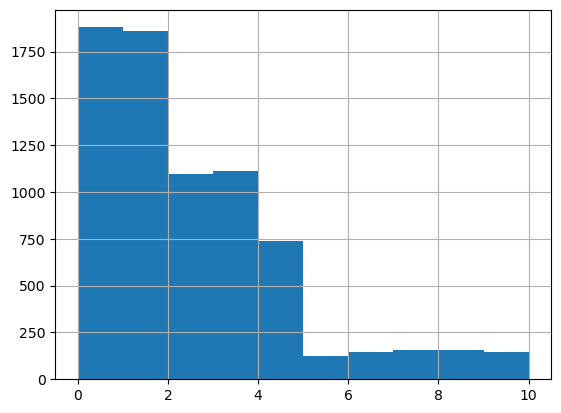

In [110]:
# Visualization of variable to determine imputation method
df.children.hist();

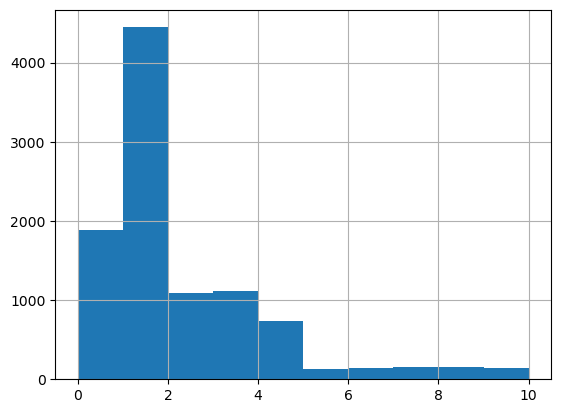

In [112]:
# Impute via median and verify visually
df.children.fillna(df.children.median(), inplace=True)
df.children.hist();

##### Age

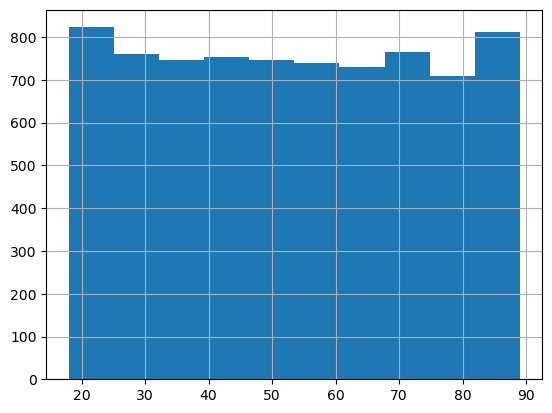

In [114]:
# Visualization of variable to determine imputation method
df.age.hist();

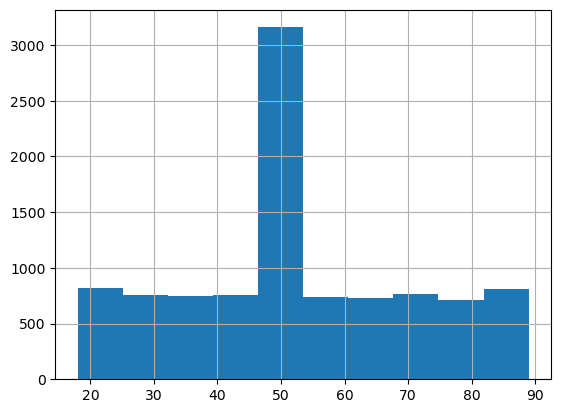

In [116]:
# Impute via mean and verify visually
df.age.fillna(df.age.mean(), inplace=True)
df.age.hist();

##### Income

<Axes: >

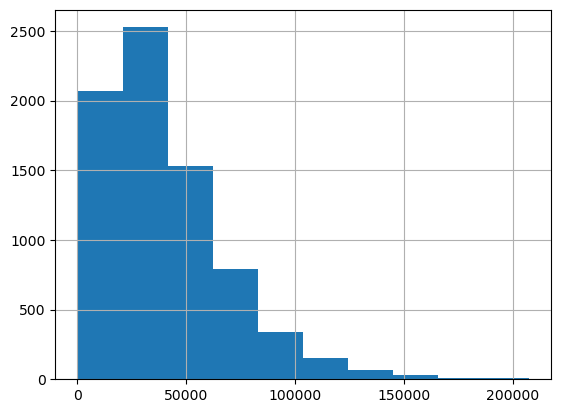

In [118]:
# Visualization of variable to determine imputation method
df.income.hist()

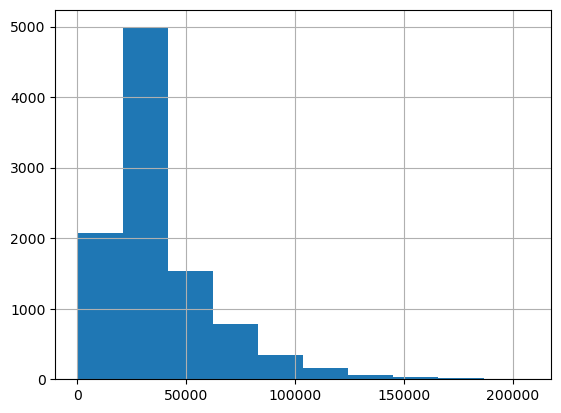

In [120]:
# Impute via median and verify visually
df.income.fillna(df.income.median(), inplace=True)
df.income.hist();

##### Initial Days

<Axes: >

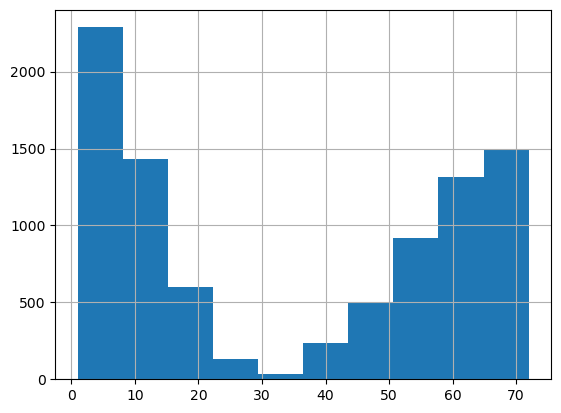

In [122]:
# Visualization of variable to determine imputation method
df.initial_days.hist()

<Axes: >

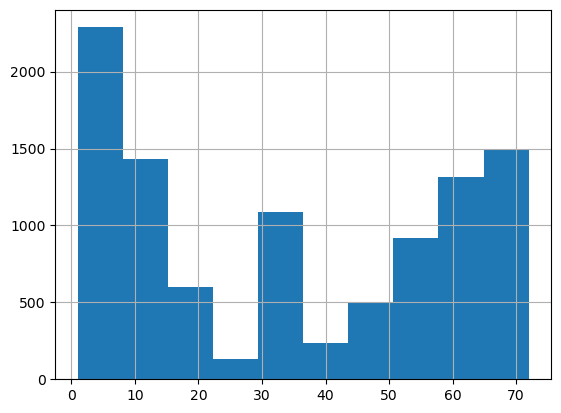

In [124]:
# Impute via median and verify visually
df.initial_days.fillna(df.initial_days.median(), inplace=True)
df.initial_days.hist()

##### Categorical Variables: Soft drink, Overweight, and Anxiety

In [126]:
# Impute categorical variables via mode
df.soft_drink.fillna(df.soft_drink.mode()[0], inplace=True)
df.overweight.fillna(df.overweight.mode()[0], inplace=True)
df.anxiety.fillna(df.anxiety.mode()[0], inplace=True)

In [128]:
# Verify imputation results
print(df.soft_drink.value_counts())
print(df.overweight.value_counts())
print(df.anxiety.value_counts())

soft_drink
No     8056
Yes    1944
Name: count, dtype: int64
overweight
1.0    7377
0.0    2623
Name: count, dtype: int64
anxiety
0.0    7094
1.0    2906
Name: count, dtype: int64


In [130]:
# Verify there are no more missing values
df.isna().sum()

case_order            0
customer_id           0
interaction           0
uid                   0
city                  0
state                 0
county                0
zip                   0
latitude              0
longitude             0
population            0
area                  0
timezone              0
job                   0
children              0
age                   0
education             0
employment            0
income                0
marital               0
gender                0
readmission           0
vit_d_level           0
doc_visits            0
full_meals_eaten      0
vit_d_supp            0
soft_drink            0
initial_admin         0
high_blood            0
stroke                0
complication_risk     0
overweight            0
arthritis             0
diabetes              0
hyperlipidemia        0
back_pain             0
anxiety               0
allergic_rhinitis     0
reflux_esophagitis    0
asthma                0
services              0
initial_days    

## Treatment of the Re-expression of Categorical Variables

In [132]:
# Format data type from 'object' to 'category' for qualitative variables with relatively few answer types
# This is to done for more efficient memory utilization
df.state = df.state.astype('category')
df.area = df.area.astype('category')
df.timezone = df.timezone.astype('category')
df.education = df.education.astype('category')
df.employment = df.employment.astype('category')
df.marital = df.marital.astype('category')
df.gender = df.gender.astype('category')
df.initial_admin = df.initial_admin.astype('category')
df.complication_risk = df.complication_risk.astype('category')
df.services = df.services.astype('category')

# Re-assign 'gender' column's 'Prefer not to answer' to 'Nonbinary' to match data dictionary
df.gender.replace({'Prefer not to answer':'Nonbinary'}, inplace=True)

# Format Zip code from integer to string object (quantitative -> qualitative) and forward fill with zeroes
df.zip = df.zip.astype('str').str.zfill(5)

In [134]:
# Format all Yes/No responses to 1/0 ordinal encoding
ord_encode = {'Yes':1, 'No':0}

df.readmission.replace(ord_encode, inplace=True)
df.soft_drink.replace(ord_encode, inplace=True)
df.high_blood.replace(ord_encode, inplace=True)
df.stroke.replace(ord_encode, inplace=True)
df.arthritis.replace(ord_encode, inplace=True)
df.diabetes.replace(ord_encode, inplace=True)
df.hyperlipidemia.replace(ord_encode, inplace=True)
df.back_pain.replace(ord_encode, inplace=True)
df.allergic_rhinitis.replace(ord_encode, inplace=True)
df.reflux_esophagitis.replace(ord_encode, inplace=True)
df.asthma.replace(ord_encode, inplace=True)

# Format other categorical variables' date type from 'float' to 'int' for consistency
df.overweight = df.overweight.astype('int')
df.anxiety = df.anxiety.astype('int')

In [136]:
# Format survey responses to an ordered categorical type utilizing the pandas documentation (Categorical data, n.d.)
from pandas.api.types import CategoricalDtype

response_order = CategoricalDtype(categories=[8,7,6,5,4,3,2,1], ordered=True)

df.item_1 = df.item_1.astype(response_order)
df.item_2 = df.item_2.astype(response_order)
df.item_3 = df.item_3.astype(response_order)
df.item_4 = df.item_4.astype(response_order)
df.item_5 = df.item_5.astype(response_order)
df.item_6 = df.item_6.astype(response_order)
df.item_7 = df.item_7.astype(response_order)
df.item_8 = df.item_8.astype(response_order)

#Verify ordinal behavior
df.item_1.head()

1    3
2    3
3    2
4    3
5    2
Name: item_1, dtype: category
Categories (8, int64): [8 < 7 < 6 < 5 < 4 < 3 < 2 < 1]

### Other Data Conversions

In [138]:
# Convert children, age, and initial_days variables from 'float' to 'int' as they are discrete in nature
df.children = df.children.astype('int')
df.age = df.age.astype('int')
df.initial_days = df.initial_days.astype('int')

#Round down vit_d_level, total_charge, and additional_charges for conciseness
df.vit_d_level = df.vit_d_level.round(2)
df.total_charge = df.total_charge.round(2)
df.additional_charges = df.additional_charges.round(2)

In [140]:
df.head()

,case_order,customer_id,interaction,uid,city,state,county,zip,latitude,longitude,population,area,timezone,job,children,age,education,employment,income,marital,gender,readmission,vit_d_level,doc_visits,full_meals_eaten,vit_d_supp,soft_drink,initial_admin,high_blood,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,initial_days,total_charge,additional_charges,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,0,17.80,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10,3191.05,17939.40,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,0,18.99,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15,4214.91,17613.00,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,0,17.42,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4,2177.59,17505.19,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,GED or Alternative Credential,Retired,39741.49,Married,Male,0,17.42,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1,2465.12,12993.44,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,Regular High School Diploma,Full Time,1209.56,Widowed,Female,0,16.87,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1,1885.66,3716.53,2,1,3,3,5,3,4,3


## Export of Cleaned Data

In [142]:
df.to_csv('medical_data_clean.csv', index=False)

## PCA

In [145]:
# Framework of code for PCA taken from Dr. Middleton's presentation (Middleton, n.d.)
# Select all quantitative variables from the dataframe
med = df[['latitude','longitude','population','children','age','income','vit_d_level','doc_visits','full_meals_eaten','vit_d_supp','initial_days','total_charge','additional_charges']]

# Normalize dataset
med_normalized = (med - med.mean()) / med.std()

# Instantiate and run PCA
pca = PCA(n_components=med.shape[1])
pca.fit(med_normalized)
med_pca = pd.DataFrame(pca.transform(med_normalized), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

# Create PCA Loadings table
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'], index=med.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
latitude,-0.021816,-0.007802,-0.714178,0.134335,-0.047362,0.028627,-0.040572,-0.051518,-0.020296,-0.044908,0.679228,-0.014996,-0.000444
longitude,-0.005491,0.017163,0.268879,-0.594250,-0.372219,0.349020,0.342016,-0.124927,0.074395,0.167793,0.384081,0.009547,0.001923
population,0.025655,-0.025327,0.630966,0.270590,0.216815,-0.198578,-0.219553,0.027726,-0.095582,-0.054244,0.616141,-0.015428,-0.001750
children,0.004409,0.011019,0.008669,0.278421,0.134188,-0.260110,0.775609,-0.353058,-0.309400,0.120483,-0.007288,-0.008866,-0.002480
age,0.083037,0.700994,0.008055,0.011392,-0.027283,-0.008940,-0.012370,-0.005248,0.018237,-0.024361,-0.002403,-0.706619,-0.016437
income,-0.006443,-0.005228,0.045158,0.216920,0.367342,0.469171,0.397426,0.314560,0.459720,-0.353815,0.047931,-0.007420,-0.001039
vit_d_level,0.539996,-0.052792,-0.057748,-0.273977,0.292117,0.128151,-0.014819,0.061514,-0.420082,-0.219839,0.001713,-0.023015,0.544178
doc_visits,-0.005437,0.012701,0.013893,0.151075,0.332189,0.531170,-0.261968,-0.641644,0.034057,0.315466,-0.057084,-0.005438,-0.000164
full_meals_eaten,-0.009350,0.036099,-0.105555,-0.301688,0.534825,-0.238264,0.055532,0.304726,0.199291,0.642560,0.070789,-0.009441,-0.001427
vit_d_supp,0.033942,0.010549,0.031806,0.384526,-0.248496,0.412834,0.028070,0.490472,-0.422879,0.443907,-0.020640,-0.004861,-0.001445


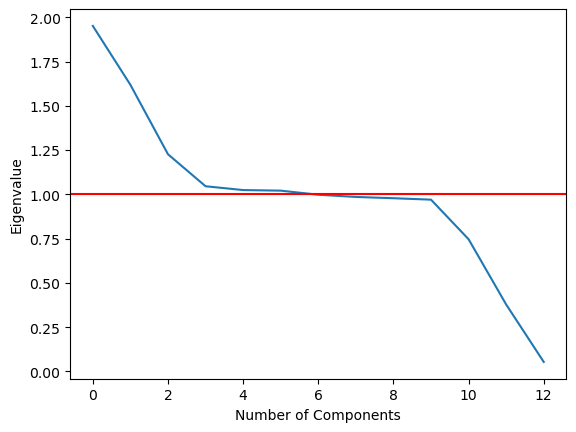

In [147]:
# Create eigenvalues
cov_matrix = np.dot(med_normalized.T, med_normalized) / med.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Create scree plot with reference line at eigenvalue = 1 to determine PCs based on Kaiser Rule
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r')
plt.show();

In [149]:
# Print eigenvalues to determine cutoff
eigenvalues

[1.951554692655022,
 1.6188574898317385,
 1.226714659983865,
 1.0459205730714516,
 1.0243752919774713,
 1.0210627742637748,
 0.9979286960414497,
 0.985496126665525,
 0.9782818399708572,
 0.9701597590940317,
 0.7466662548717078,
 0.37810160419090394,
 0.05358023738222893]